In [1]:
import pandas as pd
import numpy as np
import itertools

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
traindata=pd.read_csv('train.csv')

In [5]:
traindata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
traindata.shape[1]

81

In [ ]:
# Visualising the missing values is important because it gives some ideas about how to delete, impute missing values

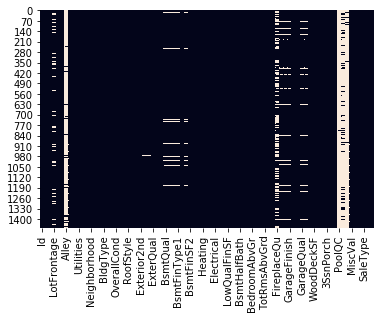

In [8]:
import seaborn as sns

sns.heatmap(traindata.isnull(),cbar=False)


In [9]:
# here I have removed all the columns where the missing value is more than 60% and those rows where there are very few missing values in 
# any particular column
to_remove_row=[]
traindata.dropna(thresh=.4*len(traindata),axis=1,inplace=True) # very handyway of removing
#traindata.dropna(thresh=.98*traindata.shape[1],axis=0,inplace=True), # not required here
for item in traindata.columns:
    #print(traindata[item].isnull().sum())
    
    
    
    if (traindata[item].isnull().sum()>0 and traindata[item].isnull().sum()< .01*len(traindata)):
        to_remove_row.append(list(traindata[traindata[item].isnull()].index))
        
    
    
#print(remove_category)
#display(to_remove_row)
display(traindata.shape)

(1460, 77)

In [10]:
to_remove_row = list(itertools.chain(*to_remove_row)) # the list received list of lists, hence needs to be expanded
to_remove_row=set(to_remove_row) # made set of the list containing the index to obtain unique elements

len(to_remove_row)

9

In [11]:

traindata=traindata.drop(index=to_remove_row)

In [12]:
traindata.shape

(1451, 77)

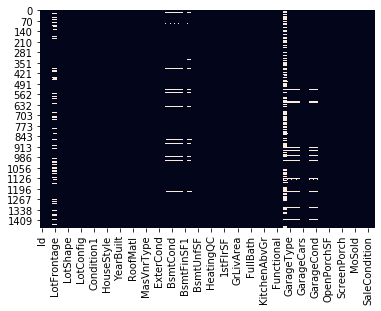

In [13]:
sns.heatmap(traindata.isnull(),cbar=False)

In [23]:
#from IPython.display import display

# Checking if missing values are MCAR in both categorical and numeric data using the Little's method- Unfortunately, I could not find the process. Can easi;y be done in R.

In [14]:

# Some important commands

#traindata.describe()

#traindata.dtypes

cont_col=traindata.select_dtypes(include=np.number).columns #  created column name list of all numerical datatype

cat_col=traindata.select_dtypes(include=object).columns  #  created column name list of all string/object datatype

# Trying imputation using Linear Regression, KNN clustering, MICE and Neural_Network

# 1. Linear Regression

In [15]:
cont_miss_col=traindata[traindata.columns[traindata.isnull().any()]].select_dtypes(include=np.number).columns #  created column name list of all null and numerical datatype

In [16]:
cat_miss_col=traindata[traindata.columns[traindata.isnull().any()]].select_dtypes(include=object).columns #  created column name list of all null & string/object datatype

In [252]:
# Observing the correlation among the continuous categories

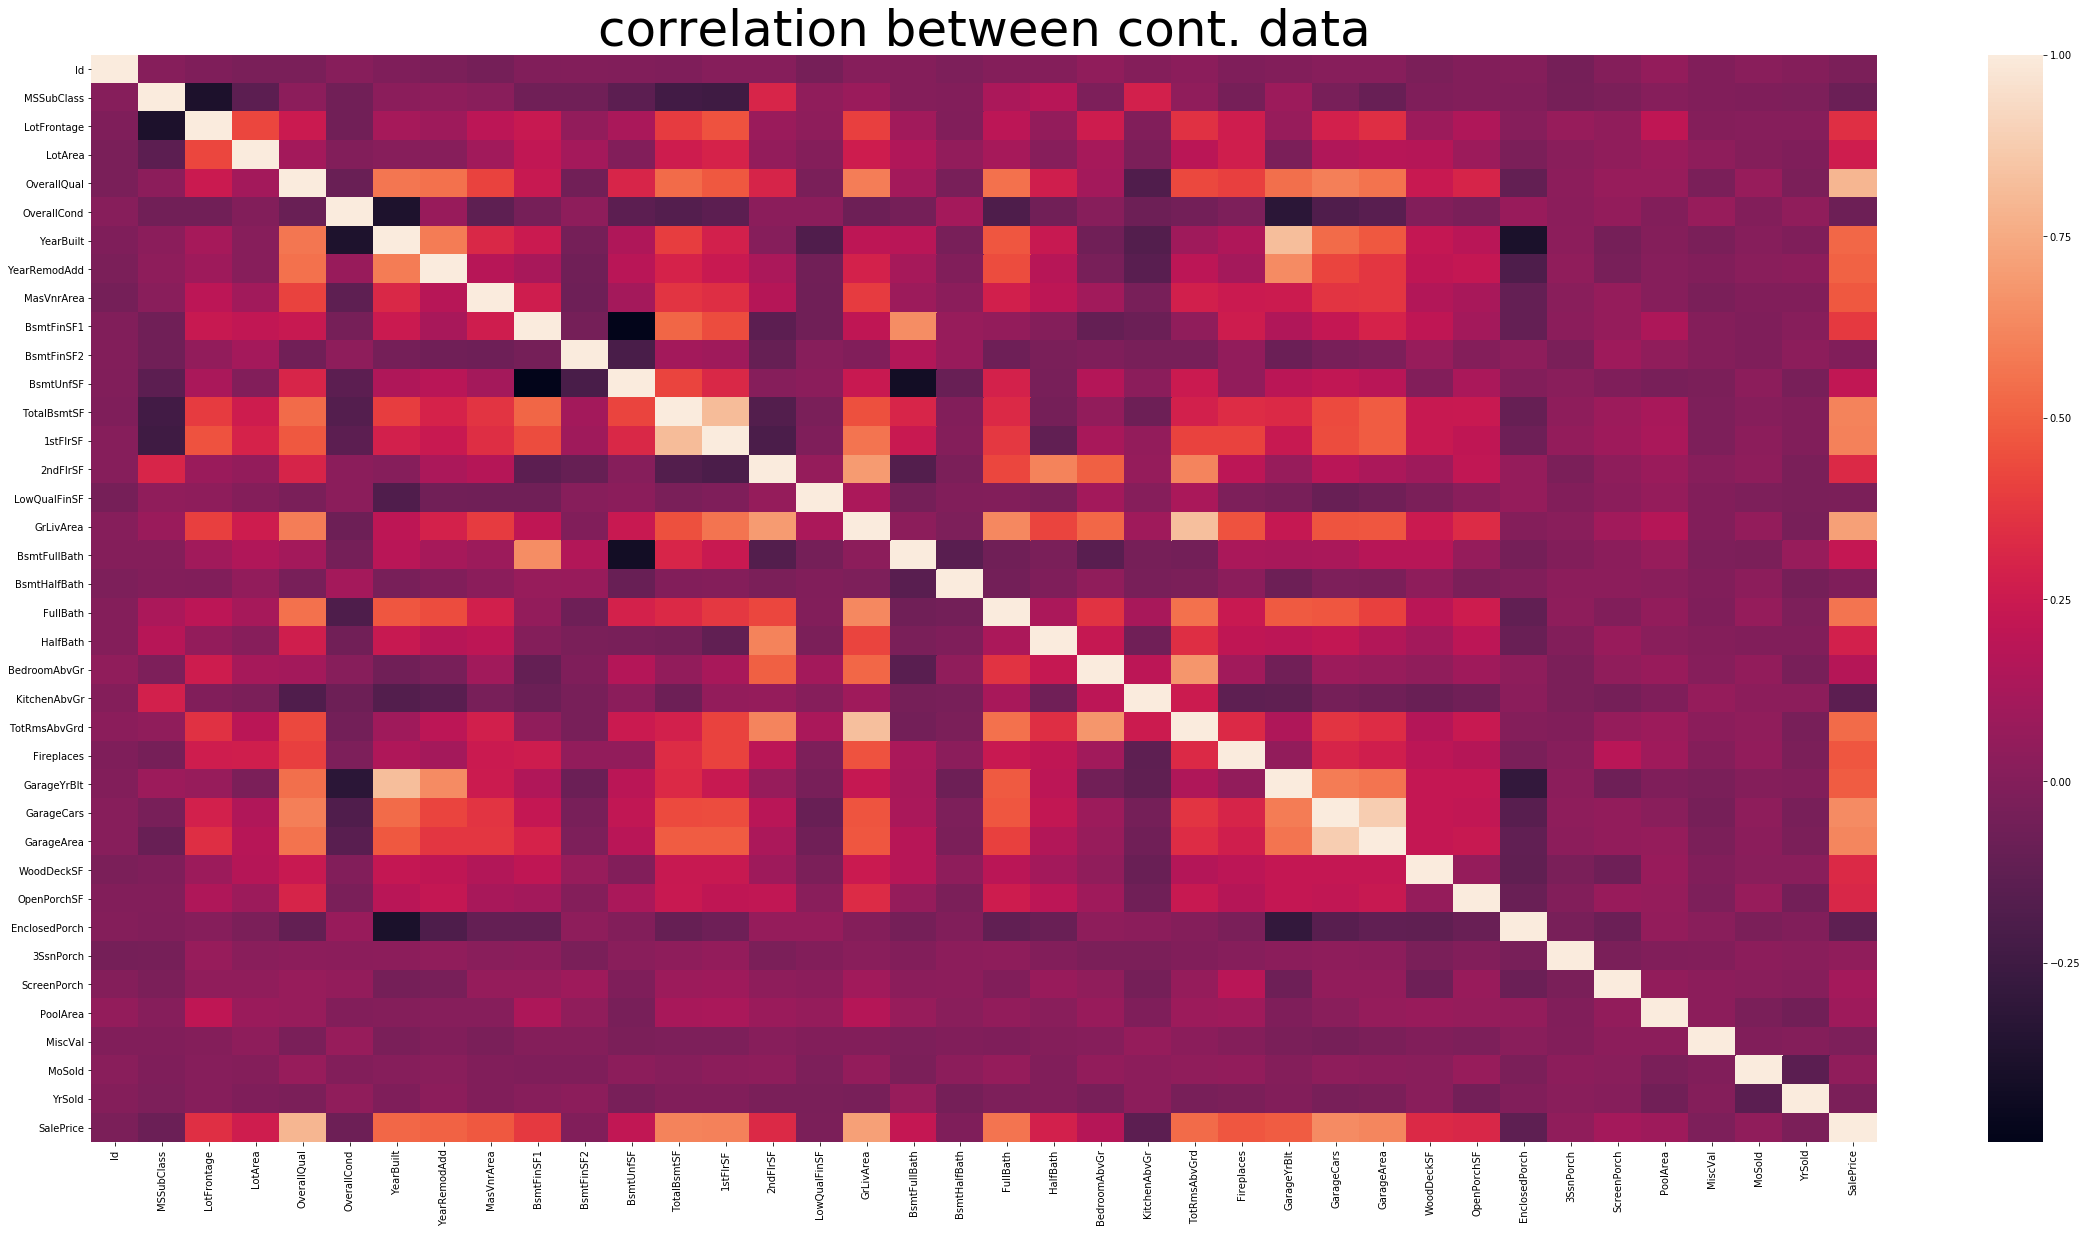

In [17]:
            plt.figure(figsize=(40,20))
plt.title('correlation between cont. data',size=50)


sns.heatmap(traindata[cont_col].corr())
#traindata_modi[cont_col]
#cont_col

In [18]:
#traindata_modi[cont_col].info()-----------------> Best way to see if any missing values

In [19]:
from scipy.stats.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [20]:
Linreg=LinearRegression()

In [ ]:
# Below are the most important steps
# 1 For columns in missing-continuous data types, obtained the dataframe with the most correlated columns.
#2. Split the dataframe in x_train(only those rows which don't have null values) and removed any column which may have any missing values
#3  Getting the y_train as the target column with values
#4 getiing the x_test which contains all those columns which corresponds to the null values in the target column, also removing any column which may have any null values
#5 y_test= All the target null values
#6. Appropriately saving all these after the linear regression was performed.

In [21]:
d={} #A dictionary can also be used to save dataframe dynamically.
for item in cont_miss_col:
    d["df{0}".format(item)]=traindata[cont_col].loc[:, traindata[cont_col].corr()[item] > 0.2]
    x_train=d["df{0}".format(item)][d["df{0}".format(item)][item].notnull()].drop(columns=item)
    x_train.dropna(how='any',axis=1, inplace=True)
    y_train=d["df{0}".format(item)][d["df{0}".format(item)][item].notnull()][item]
    x_test=d["df{0}".format(item)][d["df{0}".format(item)][item].isnull()].drop(columns=item)
    x_test.dropna(how='any',axis=1, inplace=True)
    y_test=d["df{0}".format(item)][d["df{0}".format(item)][item].isnull()][item]
    
    Linreg.fit(x_train,y_train)
    predicted=Linreg.predict(x_test)
    #display(pd.DataFrame(predicted))
    d["df{0}".format(item)].loc[d["df{0}".format(item)][item].isnull(),item]=predicted
    #display(d["df{0}".format(item)].info())
    traindata[item]=d["df{0}".format(item)][item]

In [22]:
traindata['LotFrontage'].isnull().any()

False

In [23]:
traindata['GarageYrBlt'].isnull().any()

False

In [24]:
traindata.select_dtypes(include=np.number).isnull().any()

Id               False
MSSubClass       False
LotFrontage      False
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea       False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt      False
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
SalePrice        False
dtype: bool

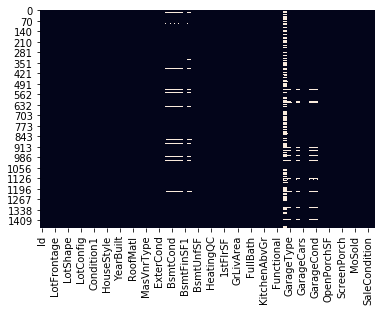

In [30]:
sns.heatmap(traindata.isnull(),cbar=False)
#only the categorical missing values are remaining.

In [25]:
# Additional commands to learn

In [26]:
d.keys()

dict_keys(['dfLotFrontage', 'dfGarageYrBlt'])

In [27]:
for item in d.keys():
    display(d[item])

#d['dfLotFrontage'].info()

,LotFrontage,LotArea,OverallQual,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,PoolArea,SalePrice
0,65.000000,8450,7,706,856,856,1710,3,8,0,2,548,0,208500
1,80.000000,9600,6,978,1262,1262,1262,3,6,1,2,460,0,181500
2,68.000000,11250,7,486,920,920,1786,3,6,1,2,608,0,223500
3,60.000000,9550,7,216,756,961,1717,3,7,1,3,642,0,140000
4,84.000000,14260,8,655,1145,1145,2198,4,9,1,3,836,0,250000
5,85.000000,14115,5,732,796,796,1362,1,5,0,2,480,0,143000
6,75.000000,10084,8,1369,1686,1694,1694,3,7,1,2,636,0,307000
7,70.611513,10382,7,859,1107,1107,2090,3,7,2,2,484,0,200000
8,51.000000,6120,7,0,952,1022,1774,2,8,2,2,468,0,129900
9,50.000000,7420,5,851,991,1077,1077,2,5,2,1,205,0,118000


,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,7,2003,2003,196.0,856,856,1710,2,2003.000000,2,548,0,61,208500
1,6,1976,1976,0.0,1262,1262,1262,2,1976.000000,2,460,298,0,181500
2,7,2001,2002,162.0,920,920,1786,2,2001.000000,2,608,0,42,223500
3,7,1915,1970,0.0,756,961,1717,1,1998.000000,3,642,0,35,140000
4,8,2000,2000,350.0,1145,1145,2198,2,2000.000000,3,836,192,84,250000
5,5,1993,1995,0.0,796,796,1362,1,1993.000000,2,480,40,30,143000
6,8,2004,2005,186.0,1686,1694,1694,2,2004.000000,2,636,255,57,307000
7,7,1973,1973,240.0,1107,1107,2090,2,1973.000000,2,484,235,204,200000
8,7,1931,1950,0.0,952,1022,1774,2,1931.000000,2,468,90,0,129900
9,5,1939,1950,0.0,991,1077,1077,1,1939.000000,1,205,0,4,118000


In [28]:
d['dfGarageYrBlt'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 14 columns):
OverallQual     1451 non-null int64
YearBuilt       1451 non-null int64
YearRemodAdd    1451 non-null int64
MasVnrArea      1451 non-null float64
TotalBsmtSF     1451 non-null int64
1stFlrSF        1451 non-null int64
GrLivArea       1451 non-null int64
FullBath        1451 non-null int64
GarageYrBlt     1451 non-null float64
GarageCars      1451 non-null int64
GarageArea      1451 non-null int64
WoodDeckSF      1451 non-null int64
OpenPorchSF     1451 non-null int64
SalePrice       1451 non-null int64
dtypes: float64(2), int64(12)
memory usage: 170.0 KB


In [29]:
d['dfLotFrontage'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 14 columns):
LotFrontage     1451 non-null float64
LotArea         1451 non-null int64
OverallQual     1451 non-null int64
BsmtFinSF1      1451 non-null int64
TotalBsmtSF     1451 non-null int64
1stFlrSF        1451 non-null int64
GrLivArea       1451 non-null int64
BedroomAbvGr    1451 non-null int64
TotRmsAbvGrd    1451 non-null int64
Fireplaces      1451 non-null int64
GarageCars      1451 non-null int64
GarageArea      1451 non-null int64
PoolArea        1451 non-null int64
SalePrice       1451 non-null int64
dtypes: float64(1), int64(13)
memory usage: 170.0 KB
